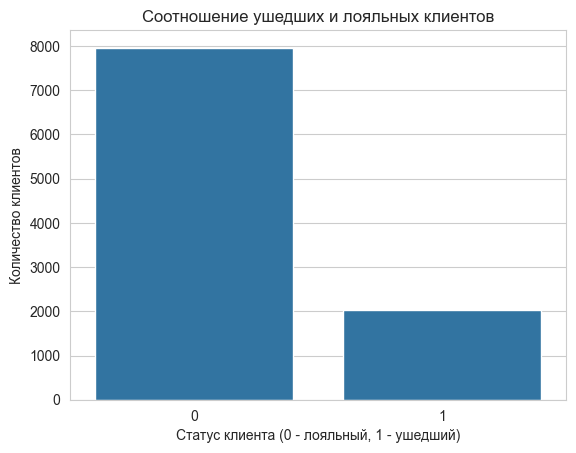

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

#Очистка данных
#Удалим столбец RowNumber, так как он не нужен для анализа.

data = churn_data.drop(columns=['RowNumber'])
#проверим таблицу.
#data.info()



# Распределение целевой переменной
sns.countplot(x='Exited', data=data)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.xlabel('Статус клиента (0 - лояльный, 1 - ушедший)')
plt.ylabel('Количество клиентов')
plt.show()


На текущий момент единственное, что понятно, это то, что 20% клиентов ушли, надо понять, за какой это период?
Из тех данных, что есть в таблице, такой вывод сделать невозможно, по этому принимаем как факт, что это много и надо понять, как стабилизировать ситуацию, как минимум, а лучше изменить тренд на восходящий.

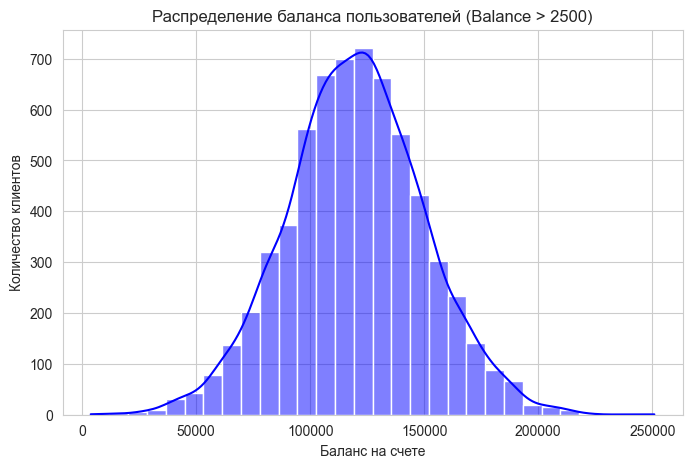

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64


In [3]:
# Фильтрация данных: оставляем только клиентов с балансом больше 2500
filtered_data = data[data['Balance'] > 2500]

# Построение гистограммы распределения баланса
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Balance'], bins=30, kde=True, color='blue')
plt.title('Распределение баланса пользователей (Balance > 2500)')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show()
print(filtered_data['Balance'].describe())

Однозначно можно сделать выводы такие, что в целом структурный баланс клиентов в правильном распределении, на первый взгляд все хорошо. Но мы должны узнать, что происходит и какие балансы у клиентов, которые ушли? 

In [15]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


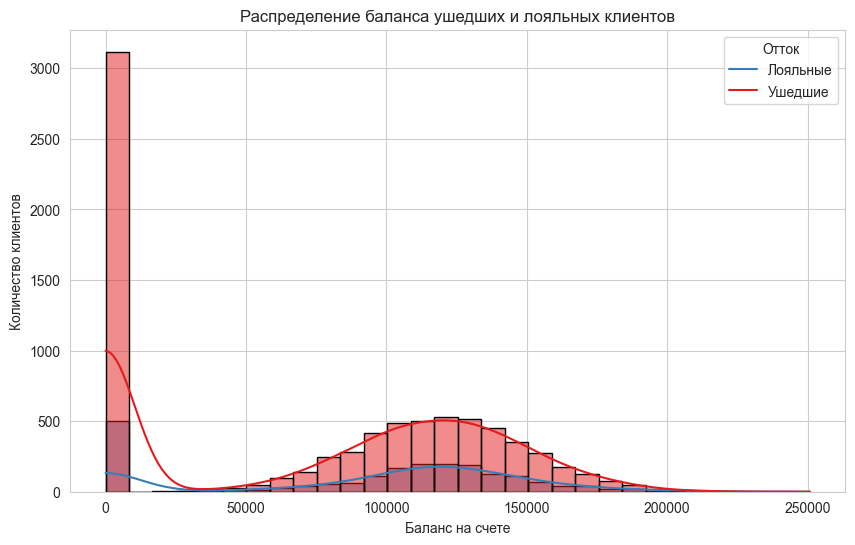

In [6]:
# Построение гистограммы и графика плотности для баланса в разрезе оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balance', hue='Exited', bins=30, kde=True, palette='Set1', edgecolor='black')
plt.title('Распределение баланса ушедших и лояльных клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])
plt.show()

In [8]:
filtered_data = data[data['Exited'] == 1]
filtered_data.



,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
